In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from profolio import Profolio

profolio = Profolio('Firstrade')
profolio.from_csv('data/FT_CSV_87701987.csv')

In [2]:
from chart import Chart
new_chart = Chart(profolio)
new_chart.ROE_DayHeld()
new_chart.WinRate_GainLose()
new_chart.Monthly_Return()

In [130]:
import yfinance as yf

df = yf.download(['^IXIC','^DJI'])
benchmark = pd.DataFrame(df['Adj Close'])

[*********************100%***********************]  2 of 2 completed


In [143]:
pair = profolio.buy_sell_pair
benchmark['return'] = pair.groupby('DateSold').sum()['return']

In [144]:
history = profolio.history
In = history[history['Action']=='Other']
In = In.groupby('TradeDate').sum()
In = In[In['Amount']>0] 
In.index = pd.DatetimeIndex(In.index)

In [145]:
In

,Symbol,Quantity,Price,Action,Amount,RecordType
TradeDate,,,,,,
2022-01-25,,0.0,0,Other,3500.0,Financial
2022-08-29,,0.0,0,Other,3000.0,Financial


In [146]:
df = pair.groupby('DateSold').sum()['return']
df.index = pd.DatetimeIndex(df.index)
benchmark['return'] = df
benchmark['in'] = In['Amount']

<AxesSubplot:xlabel='Date'>

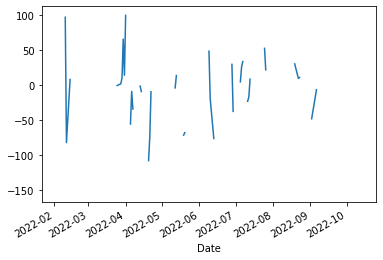

In [147]:
start_date = min(In.index)
df = benchmark[benchmark.index>=start_date] 
df['return'].plot()


In [148]:
df

,^DJI,^IXIC,return,in
Date,,,,
2022-01-25,34297.730469,13539.290039,NaN,3500.0
2022-01-26,34168.089844,13542.120117,NaN,NaN
2022-01-27,34160.781250,13352.780273,NaN,NaN
2022-01-28,34725.468750,13770.570312,NaN,NaN
2022-01-31,35131.859375,14239.879883,NaN,NaN
...,...,...,...,...
2022-10-28,32861.800781,11102.450195,NaN,NaN
2022-10-31,32732.949219,10988.150391,NaN,NaN
2022-11-01,32653.199219,10890.849609,NaN,NaN


In [149]:
df = df.replace(np.nan, 0)
df['cum_return'] = df.cumsum()['return']
df['principal'] = df.cumsum()['in']

In [150]:
df['cummulative_return'] = df['cum_return']+df['principal']

In [152]:
df.iloc[:,0] = df.iloc[:,0]/df.iloc[0,0]
df.iloc[:,1] = df.iloc[:,1]/df.iloc[0,1]
df['cummulative_return_rate']=df['cummulative_return']/df['principal']

In [153]:
df

,^DJI,^IXIC,return,in,cum_return,principal,cummulative_return,cummulative_return_rate
Date,,,,,,,,
2022-01-25,1.000000,1.000000,0.0,3500.0,0.0000,3500.0,3500.0000,1.000000
2022-01-26,0.996220,1.000209,0.0,0.0,0.0000,3500.0,3500.0000,1.000000
2022-01-27,0.996007,0.986225,0.0,0.0,0.0000,3500.0,3500.0000,1.000000
2022-01-28,1.012471,1.017082,0.0,0.0,0.0000,3500.0,3500.0000,1.000000
2022-01-31,1.024320,1.051745,0.0,0.0,0.0000,3500.0,3500.0000,1.000000
...,...,...,...,...,...,...,...,...
2022-10-28,0.958133,0.820017,0.0,0.0,-551.9992,6500.0,5948.0008,0.915077
2022-10-31,0.954377,0.811575,0.0,0.0,-551.9992,6500.0,5948.0008,0.915077
2022-11-01,0.952051,0.804389,0.0,0.0,-551.9992,6500.0,5948.0008,0.915077


In [154]:
df.columns

Index(['^DJI', '^IXIC', 'return', 'in', 'cum_return', 'principal',
       'cummulative_return', 'cummulative_return_rate'],
      dtype='object')

In [157]:
px.line(df.loc[:,['^DJI', '^IXIC', 'cummulative_return_rate']])
#px.bar(df['return'])

In [ ]:
from datetime import datetime
import yfinance as yf
df = profolio.history
df = df[df['Action']!='Other']
storage = df.groupby('Symbol').sum()['Quantity'].sort_values(ascending=False)
storage.index = storage.index.str.strip()
storage = pd.DataFrame(storage[storage>0])


price = yf.download(list(storage.index),start=datetime.now())


[*********************100%***********************]  12 of 12 completed


In [ ]:
price['Adj Close'].iloc[0]

AAPL    138.880005
AMD      60.110001
BND      69.879997
FSLR    157.729996
GOOG     83.489998
GTLB     41.599998
HSY     232.149994
MSFT    214.250000
NFLX    269.059998
NVDA    134.210007
TSLA    215.309998
UBER     28.730000
Name: 2022-11-03 00:00:00, dtype: float64

In [ ]:
storage['price'] = price['Adj Close'].iloc[0]
storage['market_value'] = storage['price']*storage['Quantity']
storage = storage.reset_index()

In [ ]:
df['Symbol'] = df['Symbol'].str.strip()

C:\Users\USER\AppData\Local\Temp\ipykernel_19300\2457424075.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df[df['Symbol']=='HSY']

,Symbol,Quantity,Price,Action,TradeDate,Amount,RecordType
66,HSY,1.0,213.85,BUY,2022-03-28,-213.85,Trade
74,HSY,1.0,217.9122,BUY,2022-03-31,-217.91,Trade
112,HSY,1.0,224.1,BUY,2022-04-13,-224.1,Trade
192,HSY,1.0,209.8266,BUY,2022-05-23,-209.83,Trade
204,HSY,-2.0,207.0454,SELL,2022-06-10,414.08,Trade
213,HSY,0.0,NaN,Dividend,2022-06-15,1.89,Financial
241,HSY,1.0,218.2656,BUY,2022-07-05,-218.27,Trade
319,HSY,0.0,NaN,Dividend,2022-09-15,2.177,Financial


In [ ]:
px.pie(storage, 'Symbol', 'market_value')